In [1]:
import matplotlib.pyplot as plt

In [2]:
class World:
    def __init__(self):
        self.objects = []
        
    def append(self, obj):
        self.objects.append(obj)
        
    def draw(self):
        fig= plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
        ax.set_aspect('equal')
        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.set_xlabel('x', fontsize=20)
        ax.set_ylabel('y', fontsize=20)
        
        for obj in self.objects:
            obj.draw(ax)
        plt.show()

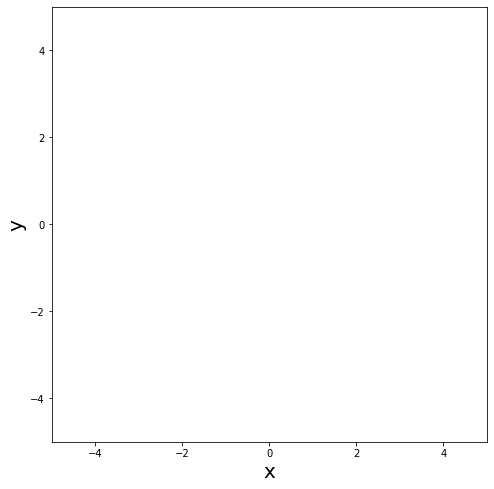

In [3]:
world = World()
world.draw()

In [4]:
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patiches
import numpy as np

In [5]:
class IdealRobot:
    def __init__(self,pose, color="black"):
        self.pose = pose
        self.r=0.2
        self.color=color
    
    def draw(self, ax):
        x,y,theta = self.pose
        xn = x+ self.r*math.cos(theta)
        yn = y+ self.r*math.sin(theta)
        ax.plot([x, xn],[y,yn], color=self.color)
        c = patiches.Circle(xy=(x,y), radius=self.r, fill=False, color=self.color)
        ax.add_patch(c)

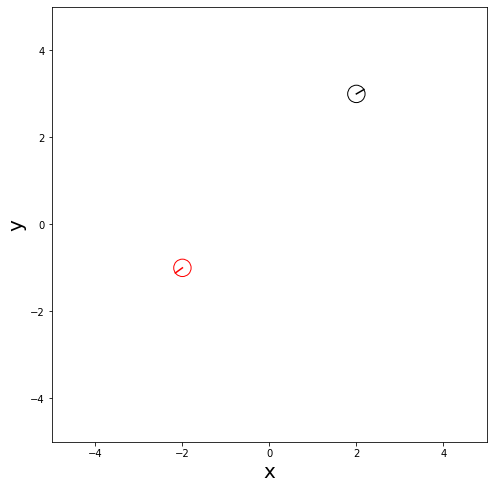

In [6]:
world = World()

robot1 = IdealRobot(np.array([2,3, math.pi/6]).T)
robot2 = IdealRobot(np.array([-2,-1, math.pi/5*6]).T,"r")

world.append(robot1)
world.append(robot2)
world.draw()

In [7]:
#アニメーションの導入

In [8]:
%matplotlib notebook

import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm

In [9]:
class World:
    def __init__(self,debug=False):
        self.objects = []
        self.debug=debug
        
    def append(self, obj):
        self.objects.append(obj)
        
    def draw(self):
        fig= plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        ax.set_aspect('equal')
        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.set_xlabel('x', fontsize=10)
        ax.set_ylabel('y', fontsize=10)
        
        elems = []
        if self.debug:
            for i in range(1000):
                self.one_step(i,elems, ax)
        else:
            self.ani =anm.FuncAnimation(fig, self.one_step, fargs=(elems, ax), frames=10, interval=1000, repeat=False)
            plt.show()

    def one_step(self, i, elems, ax):
        while elems: elems.pop().remove()
        elems.append(ax.text(-4.4, 4.5,"t="+str(i),fontsize=10))
        for obj in self.objects:
            obj.draw(ax, elems)
    

In [10]:
class IdealRobot:
    def __init__(self,pose, color="black"):
        self.pose = pose
        self.r=0.2
        self.color=color
    
    def draw(self, ax, elems):
        x,y,theta = self.pose
        xn = x+ self.r*math.cos(theta)
        yn = y+ self.r*math.sin(theta)
        elems += ax.plot([x, xn], [y,yn], color=self.color)
        c = patiches.Circle(xy=(x,y), radius=self.r, fill=False, color=self.color)
        elems.append(ax.add_patch(c))

<IPython.core.display.Javascript object>


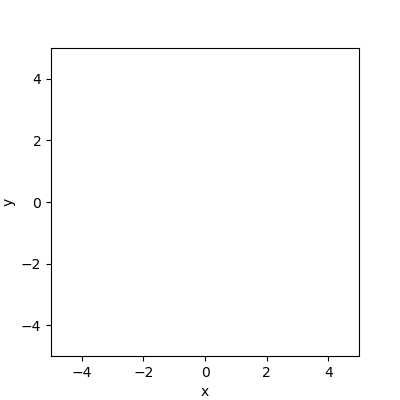

In [11]:
world = World()

robot1 = IdealRobot(np.array([2,3, math.pi/6]).T)
robot2 = IdealRobot(np.array([-2,-1, math.pi/5*6]).T,"r")

world.append(robot1)
world.append(robot2)
world.draw()

In [12]:
#エージェントの実装

In [13]:
class Agent:
    def __init__(self, nu, omega):
        self.nu=nu
        self.omega = omega
    
    def decision(self, observation=None):
        return self.nu, self.omega


In [14]:
class IdealRobot:
    def __init__(self,pose, agent=None, color="black"):
        self.pose = pose
        self.r=0.2
        self.color=color
        self.agent=agent
        self.poses = [pose]
    
    def draw(self, ax, elems):
        x,y,theta = self.pose
        xn = x+ self.r*math.cos(theta)
        yn = y+ self.r*math.sin(theta)
        elems += ax.plot([x, xn], [y,yn], color=self.color)
        c = patiches.Circle(xy=(x,y), radius=self.r, fill=False, color=self.color)
        elems.append(ax.add_patch(c))
        
        self.poses.append(self.pose)
        elems+=ax.plot([e[0] for e in self.poses], [e[1] for e in self.poses], linewidth=0.5, c="b")

<IPython.core.display.Javascript object>


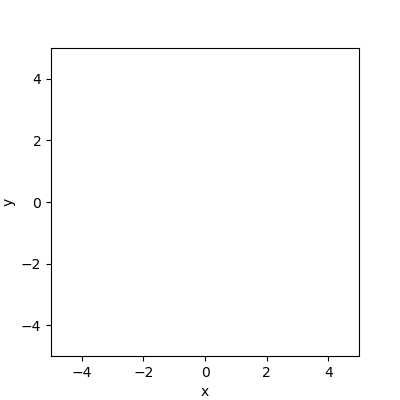

In [15]:
world = World()
straight=Agent(0.2, 0.0)
circling=Agent(0.2, 10.0/180*math.pi)
robot1 = IdealRobot(np.array([2,3, math.pi/6]).T, straight)
robot2 = IdealRobot(np.array([-2,-1,math.pi/5*6]).T,circling,"red")
robot3 = IdealRobot(np.array([0,0,0]).T, color="b")
world.append(robot1)
world.append(robot2)
world.append(robot3)
world.draw()

In [16]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
import numpy as np

In [17]:
class World:        ### fig:world_init_add_timespan (1-6行目)
    def __init__(self, time_span, time_interval, debug=False): #time_span, time_intervalを追加
        self.objects = []  
        self.debug = debug
        self.time_span = time_span                  # 追加
        self.time_interval = time_interval          # 追加
        
    def append(self,obj):             # オブジェクトを登録するための関数
        self.objects.append(obj)
    
    def draw(self):            ### fig:world_draw_with_timespan (11, 22-36行目)
        fig = plt.figure(figsize=(4,4))                # 8x8 inchの図を準備
        ax = fig.add_subplot(111)                      # サブプロットを準備
        ax.set_aspect('equal')                         # 縦横比を座標の値と一致させる
        ax.set_xlim(-5,5)                              # X軸を-5m x 5mの範囲で描画
        ax.set_ylim(-5,5)                              # Y軸も同様に
        ax.set_xlabel("X",fontsize=10)                 # X軸にラベルを表示
        ax.set_ylabel("Y",fontsize=10)                 # 同じくY軸に
        
        elems = []
        
        if self.debug:        
            for i in range(int(self.time_span/self.time_interval)): self.one_step(i, elems, ax)  #固定値から変更
        else:
            ### FuncAnimationのframes, intervalを変更 ###
            self.ani = anm.FuncAnimation(fig, self.one_step, fargs=(elems, ax),
                                     frames=int(self.time_span/self.time_interval)+1, interval=int(self.time_interval*1000), repeat=False)
            plt.show()
        
    def one_step(self, i, elems, ax):
        while elems: elems.pop().remove()
        time_str = "t = %.2f[s]" % (self.time_interval*i)    # 時刻として表示する文字列
        elems.append(ax.text(-4.4, 4.5, time_str, fontsize=10))
        for obj in self.objects:
            obj.draw(ax, elems)
            if hasattr(obj, "one_step"): obj.one_step(self.time_interval)  

In [18]:
class IdealRobot:                         ### fig:rewrite_init_for_agent 
    def __init__(self, pose, agent=None, color="black"):  # agentという引数を追加
        self.pose = pose 
        self.r = 0.2 
        self.color = color 
        self.agent = agent   # 追加
        self.poses = [pose]         # 軌跡の描画用。追加
    
    def draw(self, ax, elems):  ###idealrobot6draw
        x, y, theta = self.pose   #ここから15行目までは変えなくて良い
        xn = x + self.r * math.cos(theta) 
        yn = y + self.r * math.sin(theta)  
        elems += ax.plot([x,xn], [y,yn], color=self.color) 
        c = patches.Circle(xy=(x, y), radius=self.r, fill=False, color=self.color) 
        elems.append(ax.add_patch(c))
        
        self.poses.append(self.pose) #以下追加。軌跡の描画
        elems += ax.plot([e[0] for e in self.poses], [e[1] for e in self.poses], linewidth=0.5, color="green")
            
#     @classmethod
    def state_transition(cls, nu, omega, time, pose):    ### fig:state_transition(20-35行目)
        t0 = pose[2]
        if math.fabs(omega) < 1e-10: #角速度がほぼゼロの場合とそうでない場合で場合分け
            return pose + np.array( [nu*math.cos(t0), 
                                     nu*math.sin(t0),
                                     omega ] ) * time
        else:
            return pose + np.array( [nu/omega*(math.sin(t0 + omega*time) - math.sin(t0)), 
                                     nu/omega*(-math.cos(t0 + omega*time) + math.cos(t0)),
                                     omega*time ] )

    def one_step(self, time_interval):            ### fig:robot_one_step
        if not self.agent: return
        nu, omega = self.agent.decision()
        self.pose = self.state_transition(nu, omega, time_interval, self.pose)

In [19]:
class Agent:                        ### fig:Agent
    def __init__(self, nu, omega):
        self.nu = nu
        self.omega = omega
        
    def decision(self, observation=None):
        return self.nu, self.omega

<IPython.core.display.Javascript object>


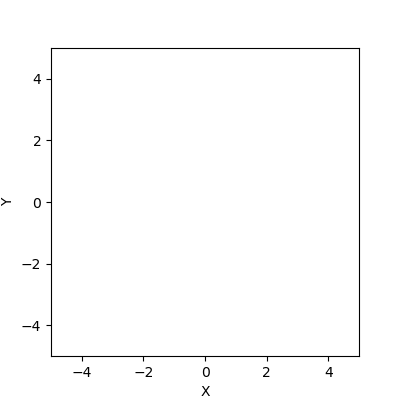

In [20]:
world = World(40, 0.1, debug=False)   # 引数を追加         ### fig:add_args_world (1行目だけ)
straight = Agent(0.2, 0.0)                # 0.2[m/s]で直進     
circling = Agent(0.2, 10.0/180*math.pi)   # 0.2[m/s], 10[deg/s]（円を描く
robot1 = IdealRobot( np.array([ 2, 3, math.pi/6]).T,    straight )  
robot2 = IdealRobot( np.array([-2, -1, math.pi/5*6]).T, circling, "red")  
robot3 = IdealRobot( np.array([ 0, 0, 0]).T, color="blue")     # コントローラを与えないロボット
world.append(robot1)
world.append(robot2)
world.append(robot3)
world.draw()

In [21]:
import numpy as np
class Landmark:
    def __init__(self, x,y):
        self.pos = np.array([x,y]).T
        self.id = None
                
    def draw(self, ax, elems):
        c = ax.scatter(self.pos[0], self.pos[1], s=100, marker="*", label="landmarks", color="orange")
        elems.append(c)
        elems.append(ax.text(self.pos[0], self.pos[1], "id:"+str(self.id), fontsize=10))
        


In [22]:
class Map:             ### fig:class_map
    def __init__(self):  
        self.landmarks = []                                     # 空のランドマークのリストを準備
        
    def append_landmark(self, landmark):       # ランドマークを追加
        landmark.id = len(self.landmarks)          # 追加するランドマークにIDを与える
        self.landmarks.append(landmark)

    def draw(self, ax, elems):                            # 描画（Landmarkのdrawを順に呼び出し）
        for lm in self.landmarks: lm.draw(ax, elems)

<IPython.core.display.Javascript object>


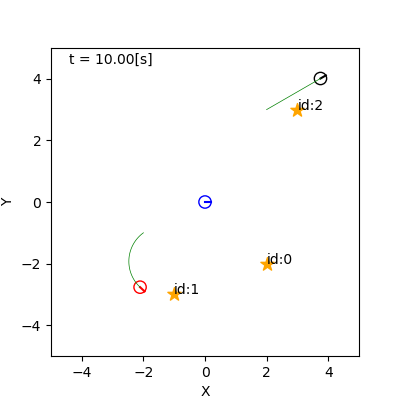

In [23]:
world = World(10, 0.1)

m=Map()
m.append_landmark(Landmark(2,-2))
m.append_landmark(Landmark(-1,-3))
m.append_landmark(Landmark(3,3))
world.append(m)

world.append(robot1)
world.append(robot2)
world.append(robot3)
world.draw()

In [49]:
class IdealCamera:
    def __init__(self, env_map, \
                 distance_range=(0.5, 6.0),
                 direction_range=(-math.pi/3, math.pi/3)):
        self.map = env_map
        self.lastdata = []
        
        self.distance_range = distance_range   #追加
        self.direction_range = direction_range  #追加
        
    def visible(self, polarpos):  # ランドマークが計測できる条件
        if polarpos is None:
            return False
        
        return self.distance_range[0] <= polarpos[0] <= self.distance_range[1] \
                and self.direction_range[0] <= polarpos[1] <= self.direction_range[1]
        
    def data(self, cam_pose):
        observed = []
        for lm in self.map.landmarks:
            z = self.observation_function(cam_pose, lm.pos)
            if self.visible(z):               # 条件を追加
                observed.append((z, lm.id))   # インデント
            
        self.lastdata = observed 
        return observed
    
    @classmethod
    def observation_function(cls, cam_pose, obj_pos):
        diff = obj_pos - cam_pose[0:2]
        phi = math.atan2(diff[1], diff[0]) - cam_pose[2]
        while phi >= np.pi: phi -= 2*np.pi
        while phi < -np.pi: phi += 2*np.pi
        return np.array( [np.hypot(*diff), phi ] ).T
    
    def draw(self, ax, elems, cam_pose): 
        for lm in self.lastdata:
            x, y, theta = cam_pose
            distance, direction = lm[0][0], lm[0][1]
            lx = x + distance * math.cos(direction + theta)
            ly = y + distance * math.sin(direction + theta)
            elems += ax.plot([x,lx], [y,ly], color="pink")

In [52]:

class IdealRobot:            ### fig:robot_camera（1,2,8,28-29行目,49-53行目）
    def __init__(self, pose, agent=None, sensor=None, color="black"):    # 引数を追加
        self.pose = pose  
        self.r = 0.2  
        self.color = color 
        self.agent = agent
        self.poses = [pose]
        self.sensor = sensor    # 追加
    
    def draw(self, ax, elems):
        x, y, theta = self.pose 
        xn = x + self.r * math.cos(theta) 
        yn = y + self.r * math.sin(theta)
        elems += ax.plot([x,xn], [y,yn], color=self.color)
        c = patches.Circle(xy=(x, y), radius=self.r, fill=False, color=self.color) 
        elems.append(ax.add_patch(c)) 
        self.poses.append(self.pose)
        elems += ax.plot([e[0] for e in self.poses], [e[1] for e in self.poses], linewidth=0.5, color="black")
        if self.sensor and len(self.poses) > 1:                    #追加
            self.sensor.draw(ax, elems, self.poses[-2])     #追加
        if self.agent and hasattr(self.agent,"draw"):
            self.agent.draw(ax.elems)
            
    @classmethod 
    def state_transition(self, nu, omega, time, pose):
        t0 = pose[2]
        if math.fabs(omega) < 1e-10:
            return pose + np.array( [nu*math.cos(t0), 
                                     nu*math.sin(t0),
                                     omega ] ) * time
        else:
            return pose + np.array( [nu/omega*(math.sin(t0 + omega*time) - math.sin(t0)), 
                                     nu/omega*(-math.cos(t0 + omega*time) + math.cos(t0)),
                                     omega*time ] )

    def one_step(self, time_interval):
        if not self.agent: return
        obs = self.sensor.data(self.pose) if self.sensor else None #追加
        nu, omega = self.agent.decision(obs) #引数追加

        self.pose = self.state_transition(nu, omega, time_interval, self.pose)

<IPython.core.display.Javascript object>


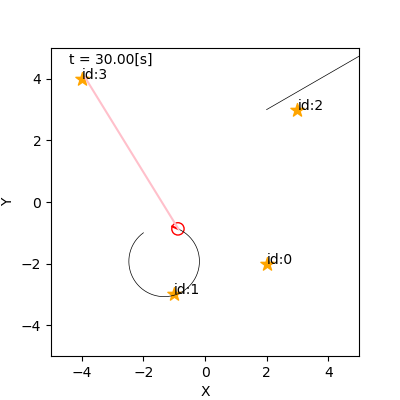

In [76]:
if __name__ == "__main__":
    world = World(30, 0.1, debug=False)           ### fig:sensor_drawing (10-19行目)

    ### 地図を生成して3つランドマークを追加 ###
    m = Map()                                  
    m.append_landmark(Landmark(2,-2))
    m.append_landmark(Landmark(-1,-3))
    m.append_landmark(Landmark(3,3))
    m.append_landmark(Landmark(-4,4))
    world.append(m)          

    ### ロボットを作る ###
    straight = Agent(0.2, 0.0)    
    circling = Agent(0.2, 10.0/180*math.pi)  
    robot1 = IdealRobot( np.array([ 2, 3, math.pi/6]).T,    sensor=IdealCamera(m), agent=straight )             # 引数にcameraを追加、整理
    robot2 = IdealRobot( np.array([-2, -1, math.pi/5*6]).T, sensor=IdealCamera(m), agent=circling, color="red")  # robot3は消しました
    world.append(robot1)
    world.append(robot2)

    ### アニメーション実行 ###
    world.draw()

In [75]:
import sys
sys.path.append("./scripts/")
from ideal_robot import *

<module 'ideal_robot' from './scripts/ideal_robot.py'>